In [4]:
import pandas as pd

import numpy as np

# Read in excel file of 2016 data
file = './Datasets/2016/Table_13_Hate_Crime_Incidents_per_Bias_Motivation_and_Quarter_by_State_and_Agency_2016.xls'

xl = pd.ExcelFile(file)

# We want the first and only sheet
df2 = xl.parse(0)

# remove the first 4 rows, which contain the title
df2_sliced = df2.loc[5:]

# rename the cols
df2_sliced.columns = ['State', 'Agency_Type', 'Agency_Name', 'Race', 'Religion', 'Sexual_Orientation', 'Disability', 'Gender', 'Gender_ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Pop']

# copy df, and then forward fill the state and agency type cols
df2_filled = df2_sliced

df2_filled[['State', 'Agency_Type']] = df2_filled[['State', 'Agency_Type']].ffill()

# copy and replace the NAs in df2_totals Agency Name col with the word total, because the NAs are only in cols w/ total
df2_totals = df2_filled

df2_totals = df2_totals.fillna(value={'Agency_Name' : 'Total'})
   
# reset index, so it starts at 1 not 5 
df2_indexed = df2_totals.reset_index()

print(df2_indexed.head())

   index    State Agency_Type Agency_Name Race Religion Sexual_Orientation  \
0      5  Alabama       Total       Total   12        1                  1   
1      6  Alabama      Cities       Total   12        1                  1   
2      7  Alabama      Cities  Birmingham    7        1                  1   
3      8  Alabama      Cities    Florence    1        0                  0   
4      9  Alabama      Cities       Foley    1        0                  0   

  Disability Gender Gender_ID   Q1   Q2   Q3   Q4     Pop  
0          0      0         0  NaN  NaN  NaN  NaN     NaN  
1          0      0         0  NaN  NaN  NaN  NaN     NaN  
2          0      0         0    3    2    2    2  212549  
3          0      0         0    0    0    1    0   40160  
4          0      0         0    0    1    0    0   17639  


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [5]:
#### I noticed some of the agency names contained numbers left over from subscript on the original data. I want to remove those.

df2_indexed['Agency_Name'] = df2_indexed.Agency_Name.str.replace('2', '')

df2_indexed['Agency_Name'] = df2_indexed.Agency_Name.str.replace('1', '')

df2_indexed.head()

,index,State,Agency_Type,Agency_Name,Race,Religion,Sexual_Orientation,Disability,Gender,Gender_ID,Q1,Q2,Q3,Q4,Pop
0,5,Alabama,Total,Total,12,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN
1,6,Alabama,Cities,Total,12,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN
2,7,Alabama,Cities,Birmingham,7,1,1,0,0,0,3,2,2,2,212549
3,8,Alabama,Cities,Florence,1,0,0,0,0,0,0,0,1,0,40160
4,9,Alabama,Cities,Foley,1,0,0,0,0,0,0,1,0,0,17639


In [6]:
## We're going to get the state abbreviations in order to match some of the datasets later
## we then make a dictionary, with the state names as keys and the abbreviations as values

state_file = './Datasets/states.csv'

states = pd.read_csv(state_file)

states_dict = pd.Series(states.Abbreviation.values, index=states.State).to_dict()

print(states_dict)

{'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}


In [7]:
## Now we create a new col in the dataset, containing the state abbreviations:

df2_abb= df2_indexed.copy()

df2_abb['Abbreviation'] = df2_abb['State'].map(states_dict)

print(df2_abb.head())

   index    State Agency_Type Agency_Name Race Religion Sexual_Orientation  \
0      5  Alabama       Total       Total   12        1                  1   
1      6  Alabama      Cities       Total   12        1                  1   
2      7  Alabama      Cities  Birmingham    7        1                  1   
3      8  Alabama      Cities    Florence    1        0                  0   
4      9  Alabama      Cities       Foley    1        0                  0   

  Disability Gender Gender_ID   Q1   Q2   Q3   Q4     Pop Abbreviation  
0          0      0         0  NaN  NaN  NaN  NaN     NaN           AL  
1          0      0         0  NaN  NaN  NaN  NaN     NaN           AL  
2          0      0         0    3    2    2    2  212549           AL  
3          0      0         0    0    0    1    0   40160           AL  
4          0      0         0    0    1    0    0   17639           AL  


In [8]:
## Next, we create another col that contains a string of the city name and the state abbreviation

df2_abb['City_State'] = df2_abb['Agency_Name'] + ", "  + df2_abb['Abbreviation']

print(df2_abb.head())

   index    State Agency_Type Agency_Name Race Religion Sexual_Orientation  \
0      5  Alabama       Total       Total   12        1                  1   
1      6  Alabama      Cities       Total   12        1                  1   
2      7  Alabama      Cities  Birmingham    7        1                  1   
3      8  Alabama      Cities    Florence    1        0                  0   
4      9  Alabama      Cities       Foley    1        0                  0   

  Disability Gender Gender_ID   Q1   Q2   Q3   Q4     Pop Abbreviation  \
0          0      0         0  NaN  NaN  NaN  NaN     NaN           AL   
1          0      0         0  NaN  NaN  NaN  NaN     NaN           AL   
2          0      0         0    3    2    2    2  212549           AL   
3          0      0         0    0    0    1    0   40160           AL   
4          0      0         0    0    1    0    0   17639           AL   

       City_State  
0       Total, AL  
1       Total, AL  
2  Birmingham, AL  
3    F

In [9]:
#### Now we get rid of every entry that's not a city (b/c we only want to examine cities)
### And we get rid of all the total agencies, as we won't use that information for out analysis

df2_cities = df2_abb[df2_abb.Agency_Type == 'Cities']

df2_cities = df2_cities[df2_cities.Agency_Name != 'Total']

df2_cities.head()

,index,State,Agency_Type,Agency_Name,Race,Religion,Sexual_Orientation,Disability,Gender,Gender_ID,Q1,Q2,Q3,Q4,Pop,Abbreviation,City_State
2,7,Alabama,Cities,Birmingham,7,1,1,0,0,0,3,2,2,2,212549,AL,"Birmingham, AL"
3,8,Alabama,Cities,Florence,1,0,0,0,0,0,0,0,1,0,40160,AL,"Florence, AL"
4,9,Alabama,Cities,Foley,1,0,0,0,0,0,0,1,0,0,17639,AL,"Foley, AL"
5,10,Alabama,Cities,Hoover,3,0,0,0,0,0,1,0,1,1,85601,AL,"Hoover, AL"
8,13,Alaska,Cities,Anchorage,4,0,0,0,0,0,1,0,2,1,299097,AK,"Anchorage, AK"


In [10]:
# Now we want to see how many datapoints were removed by taking out the cities and totals

len(df2_abb) - len(df2_cities)

754

In [11]:
##### Now we read in the dataset with the information about the counties, which we will use to match the
##### Hate Crime dataset with the dataset containing political and demographic information

county_file = './Datasets/uscitiesv1.4.csv'

counties = pd.read_csv(county_file)

counties.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
0,Prairie Ridge,Prairie Ridge,WA,Washington,53053,Pierce,47.1443,-122.1408,NaN,NaN,1349.8,polygon,False,America/Los_Angeles,98360 98391,1840037882
1,Edison,Edison,WA,Washington,53057,Skagit,48.5602,-122.4311,NaN,NaN,127.4,polygon,False,America/Los_Angeles,98232,1840017314
2,Packwood,Packwood,WA,Washington,53041,Lewis,46.6085,-121.6702,NaN,NaN,213.9,polygon,False,America/Los_Angeles,98361,1840025265
3,Wautauga Beach,Wautauga Beach,WA,Washington,53035,Kitsap,47.5862,-122.5482,NaN,NaN,261.7,point,False,America/Los_Angeles,98366,1840037725
4,Harper,Harper,WA,Washington,53035,Kitsap,47.5207,-122.5196,NaN,NaN,342.1,point,False,America/Los_Angeles,98366,1840037659


In [12]:
## Now I'll make a col containing the state, city, and county, and remove all duplicates
## so that we have only unique sets (b/c there are duplicates in dataset because it also includes unique log and lat)

counties['City_County'] = counties.state_id + ", " + counties.city + ", " + counties.county_name

counties.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id,City_County
0,Prairie Ridge,Prairie Ridge,WA,Washington,53053,Pierce,47.1443,-122.1408,NaN,NaN,1349.8,polygon,False,America/Los_Angeles,98360 98391,1840037882,"WA, Prairie Ridge, Pierce"
1,Edison,Edison,WA,Washington,53057,Skagit,48.5602,-122.4311,NaN,NaN,127.4,polygon,False,America/Los_Angeles,98232,1840017314,"WA, Edison, Skagit"
2,Packwood,Packwood,WA,Washington,53041,Lewis,46.6085,-121.6702,NaN,NaN,213.9,polygon,False,America/Los_Angeles,98361,1840025265,"WA, Packwood, Lewis"
3,Wautauga Beach,Wautauga Beach,WA,Washington,53035,Kitsap,47.5862,-122.5482,NaN,NaN,261.7,point,False,America/Los_Angeles,98366,1840037725,"WA, Wautauga Beach, Kitsap"
4,Harper,Harper,WA,Washington,53035,Kitsap,47.5207,-122.5196,NaN,NaN,342.1,point,False,America/Los_Angeles,98366,1840037659,"WA, Harper, Kitsap"


In [13]:
### Now we create the seperate city, state, and county cols, and get rid of all the other info we don't need

counties3 = counties['City_County'].str.split(pat=', ', expand = True)

counties3.columns = ['State', 'City', 'County']

counties3['City_State'] = counties3.City + ", " + counties3.State

counties3.head()

,State,City,County,City_State
0,WA,Prairie Ridge,Pierce,"Prairie Ridge, WA"
1,WA,Edison,Skagit,"Edison, WA"
2,WA,Packwood,Lewis,"Packwood, WA"
3,WA,Wautauga Beach,Kitsap,"Wautauga Beach, WA"
4,WA,Harper,Kitsap,"Harper, WA"


In [14]:
#### Now we're going to make a dictionary, to match the city_state col with the county col

counties_dict1 = pd.Series(counties3.County.values, index=counties3.City_State).to_dict()

#print(counties_dict1)

In [15]:
#### So now we have a dataset with all the cities and counties, which should help us determine the county for each city in our original dataframe

df2_counties = df2_cities.copy()

df2_counties['County'] = df2_counties['City_State'].map(counties_dict1)

print(df2_counties.head())

   index    State Agency_Type Agency_Name Race Religion Sexual_Orientation  \
2      7  Alabama      Cities  Birmingham    7        1                  1   
3      8  Alabama      Cities    Florence    1        0                  0   
4      9  Alabama      Cities       Foley    1        0                  0   
5     10  Alabama      Cities      Hoover    3        0                  0   
8     13   Alaska      Cities   Anchorage    4        0                  0   

  Disability Gender Gender_ID Q1 Q2 Q3 Q4     Pop Abbreviation  \
2          0      0         0  3  2  2  2  212549           AL   
3          0      0         0  0  0  1  0   40160           AL   
4          0      0         0  0  1  0  0   17639           AL   
5          0      0         0  1  0  1  1   85601           AL   
8          0      0         0  1  0  2  1  299097           AK   

       City_State      County  
2  Birmingham, AL   Jefferson  
3    Florence, AL  Lauderdale  
4       Foley, AL     Baldwin  
5     

In [16]:
### Now we want to know how many matches we can find, and thus how much information we can match

len(df2_counties)

1265

In [17]:
df2_counties['County'].isnull().sum()

196

In [18]:
(1265 - 196)/1265 # so we have the county info for about 85% of the cities, or 1069

0.8450592885375494

In [19]:
############ Now we read in the datasets that contain the election results
# clean that, rehape so each candidate is a col, and organize it by county

prez_file = './Datasets/pres16results.csv'

prez_df = pd.read_csv(prez_file)

print(prez_df.head())

  county fips             cand  st  pct_report       votes  total_votes  \
0    NaN   US     Donald Trump  US      0.9951  60350241.0  127592176.0   
1    NaN   US  Hillary Clinton  US      0.9951  60981118.0  127592176.0   
2    NaN   US     Gary Johnson  US      0.9951   4164589.0  127592176.0   
3    NaN   US       Jill Stein  US      0.9951   1255968.0  127592176.0   
4    NaN   US    Evan McMullin  US      0.9951    451636.0  127592176.0   

        pct          lead  
0  0.472993  Donald Trump  
1  0.477938  Donald Trump  
2  0.032640  Donald Trump  
3  0.009844  Donald Trump  
4  0.003540  Donald Trump  


In [20]:
# removing the cols we're not going to use, and dropping ann NAs (because they indicate a total count, not per county)

prez_df1 = prez_df[['county', 'cand', 'st', 'pct']]

prez_df2 = prez_df1.dropna()

print(prez_df2.head())

                 county             cand  st       pct
159  Los Angeles County  Hillary Clinton  CA  0.714965
160  Los Angeles County     Donald Trump  CA  0.234454
161  Los Angeles County     Gary Johnson  CA  0.024589
162  Los Angeles County       Jill Stein  CA  0.020171
163  Los Angeles County   Gloria La Riva  CA  0.005821


In [21]:
### Now we remove the word county from the counties, so they can be matched

prez_df2['county'] = prez_df2.county.str.replace(' County', '')

print(prez_df2.head())

          county             cand  st       pct
159  Los Angeles  Hillary Clinton  CA  0.714965
160  Los Angeles     Donald Trump  CA  0.234454
161  Los Angeles     Gary Johnson  CA  0.024589
162  Los Angeles       Jill Stein  CA  0.020171
163  Los Angeles   Gloria La Riva  CA  0.005821


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
### Now we create a county state col

prez_df2['County_State'] = prez_df2.county + ", " + prez_df2.st

print(prez_df2.head())

          county             cand  st       pct     County_State
159  Los Angeles  Hillary Clinton  CA  0.714965  Los Angeles, CA
160  Los Angeles     Donald Trump  CA  0.234454  Los Angeles, CA
161  Los Angeles     Gary Johnson  CA  0.024589  Los Angeles, CA
162  Los Angeles       Jill Stein  CA  0.020171  Los Angeles, CA
163  Los Angeles   Gloria La Riva  CA  0.005821  Los Angeles, CA


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
### now we reshape the data so that each candidate is a col

prez_reshape = prez_df2.pivot(index = 'County_State', columns = 'cand', values = 'pct')

print(prez_reshape.head())

cand                None of these candidates  Alyson Kennedy  Bradford Lyttle  \
County_State                                                                    
Abbeville, SC                            NaN             NaN              NaN   
Acadia Parish, LA                        NaN        0.000292              NaN   
Accomack, VA                             NaN             NaN              NaN   
Ada, ID                                  NaN             NaN              NaN   
Adair, IA                                NaN             NaN              NaN   

cand               Chris Keniston  Dan Vacek  Darrell Castle  Donald Trump  \
County_State                                                                 
Abbeville, SC                 NaN        NaN        0.003543      0.628683   
Acadia Parish, LA        0.001022        NaN        0.001826      0.772621   
Accomack, VA                  NaN        NaN             NaN      0.544716   
Ada, ID                       NaN        N

In [24]:
# Next we check the names of the cols, to see how to proceed

print(prez_reshape.columns)

Index([' None of these candidates', 'Alyson Kennedy', 'Bradford Lyttle',
       'Chris Keniston', 'Dan Vacek', 'Darrell Castle', 'Donald Trump',
       'Emidio Soltysik', 'Evan McMullin', 'Frank Atwood', 'Gary Johnson',
       'Gloria La Riva', 'Hillary Clinton', 'Jerry White', 'Jill Stein',
       'Jim Hedges', 'Joseph Maldonado', 'Kyle Kopitke', 'Laurence Kotlikoff',
       'Lynn Kahn', 'Michael Maturen', 'Mike Smith', 'Monica Moorehead',
       'Peter Skewes', 'Princess Jacob', 'Richard Duncan',
       'Rocky De La Fuente', 'Rocky Giordani', 'Rod Silva', 'Ryan Scott',
       'Scott Copeland', 'Tom Hoefling'],
      dtype='object', name='cand')


In [70]:
## Now we're going to reorder some of the cols

prez_reshape = prez_reshape[['Donald Trump', 'Hillary Clinton', ' None of these candidates', 'Alyson Kennedy', 'Bradford Lyttle',
       'Chris Keniston', 'Dan Vacek', 'Darrell Castle',
       'Emidio Soltysik', 'Evan McMullin', 'Frank Atwood', 'Gary Johnson',
       'Gloria La Riva', 'Jerry White', 'Jill Stein',
       'Jim Hedges', 'Joseph Maldonado', 'Kyle Kopitke', 'Laurence Kotlikoff',
       'Lynn Kahn', 'Michael Maturen', 'Mike Smith', 'Monica Moorehead',
       'Peter Skewes', 'Princess Jacob', 'Richard Duncan',
       'Rocky De La Fuente', 'Rocky Giordani', 'Rod Silva', 'Ryan Scott',
       'Scott Copeland', 'Tom Hoefling']]

print(prez_reshape.head())

KeyError: "['Donald_Trump' 'Hillary_Clinton'] not in index"

In [26]:
## Now we're going to create another dataset that doesn't contain Trump or Clinton, so we can then use a summation and
## create another col, Independent, for the independents

col_list = list(prez_reshape)

col_list.remove('Donald Trump')
col_list.remove('Hillary Clinton')

prez_reshape['Independent'] = prez_reshape[col_list].sum(axis=1)

pres_reshaped_final = prez_reshape[['Donald Trump', 'Hillary Clinton', 'Independent']]

print(pres_reshaped_final.head())

cand               Donald Trump  Hillary Clinton  Independent
County_State                                                 
Abbeville, SC          0.628683         0.346140     0.025177
Acadia Parish, LA      0.772621         0.205872     0.021507
Accomack, VA           0.544716         0.427610     0.027674
Ada, ID                0.479316         0.386917     0.133767
Adair, IA              0.653365         0.299814     0.046821


In [27]:
#### Now we're gonna merge the political information with the hate crime dataset

# here, we create the county state variable to merge on, since each county name might be repeated across states
df2_counties['County_State'] = df2_counties.County + ", " + df2_counties.Abbreviation

df2_counties.head()

,index,State,Agency_Type,Agency_Name,Race,Religion,Sexual_Orientation,Disability,Gender,Gender_ID,Q1,Q2,Q3,Q4,Pop,Abbreviation,City_State,County,County_State
2,7,Alabama,Cities,Birmingham,7,1,1,0,0,0,3,2,2,2,212549,AL,"Birmingham, AL",Jefferson,"Jefferson, AL"
3,8,Alabama,Cities,Florence,1,0,0,0,0,0,0,0,1,0,40160,AL,"Florence, AL",Lauderdale,"Lauderdale, AL"
4,9,Alabama,Cities,Foley,1,0,0,0,0,0,0,1,0,0,17639,AL,"Foley, AL",Baldwin,"Baldwin, AL"
5,10,Alabama,Cities,Hoover,3,0,0,0,0,0,1,0,1,1,85601,AL,"Hoover, AL",Jefferson,"Jefferson, AL"
8,13,Alaska,Cities,Anchorage,4,0,0,0,0,0,1,0,2,1,299097,AK,"Anchorage, AK",Anchorage,"Anchorage, AK"


In [28]:
### Now we do the merge, using the ID and the County_State cols, and we use a left merge because we're only interested in info from the hate crimes dataset
merge1 = pd.merge(df2_counties, pres_reshaped_final, right_index = True, left_on = 'County_State', how='left')

print(merge1.head())

   index    State Agency_Type Agency_Name Race Religion Sexual_Orientation  \
2      7  Alabama      Cities  Birmingham    7        1                  1   
3      8  Alabama      Cities    Florence    1        0                  0   
4      9  Alabama      Cities       Foley    1        0                  0   
5     10  Alabama      Cities      Hoover    3        0                  0   
8     13   Alaska      Cities   Anchorage    4        0                  0   

  Disability Gender Gender_ID     ...      Q3 Q4     Pop Abbreviation  \
2          0      0         0     ...       2  2  212549           AL   
3          0      0         0     ...       1  0   40160           AL   
4          0      0         0     ...       0  0   17639           AL   
5          0      0         0     ...       1  1   85601           AL   
8          0      0         0     ...       2  1  299097           AK   

       City_State      County    County_State Donald Trump Hillary Clinton  \
2  Birmingham,

In [29]:
### now we look at the missing datapoints

merge1['Donald Trump'].isnull().sum() 


218

We don't have political information for aprox 218 counties, BUT 196 of the cities don't have county info, so that makes sense

In [30]:
############### Next, we import and clean the dataset with the demographic informaton about each political county

facts_file = './Datasets/2016-us-election/county_facts.csv'

facts_df = pd.read_csv(facts_file)

### Removes the word county from the area name, so it can be matched with state

facts_df['area_name'] = facts_df.area_name.str.replace(' County', '')

print(facts_df.head())

   fips      area_name state_abbreviation  PST045214  PST040210  PST120214  \
0     0  United States                NaN  318857056  308758105        3.3   
1  1000        Alabama                NaN    4849377    4780127        1.4   
2  1001        Autauga                 AL      55395      54571        1.5   
3  1003        Baldwin                 AL     200111     182265        9.8   
4  1005        Barbour                 AL      26887      27457       -2.1   

   POP010210  AGE135214  AGE295214  AGE775214    ...      SBO415207  \
0  308745538        6.2       23.1       14.5    ...            8.3   
1    4779736        6.1       22.8       15.3    ...            1.2   
2      54571        6.0       25.2       13.8    ...            0.7   
3     182265        5.6       22.2       18.7    ...            1.3   
4      27457        5.7       21.2       16.5    ...            0.0   

   SBO015207   MAN450207   WTN220207   RTN130207  RTN131207  AFN120207  \
0       28.8  5319456312  4174

In [31]:
### we're gonna rename the cols to make them more readable, and to pick which we want to use


col_names_facts = ['fips', 'area_name', 'state_abbreviation', 'pop2014', 'pop2010base', 'pop_change', 'pop2010', 'under5', 'under18', 'over65', 'female_pct', 'white_pct', 'black_pct', 
                   'native_american_pct', 'asian_pct', 'pacific_pct', 'biracial_pct', 'hispanic_pct', 'white_not_hispanic', 'same_house_pct', 'foreign_born_pct', 'non-english_home_pct', 'hs_higher_pct',
                   'college_pct', 'vetrans', 'time_to_work', 'housing_units', 'homeownership', 'housing_multiunits', 'housing_value', 'households', 'persons_per_household', 
                   'per_cap_income', 'median_household_income', 'below_pov_pct', 'nonfarms', 'nonfarm_employment', 'nonfarm_pct_change', 'nonemployments', 'num_firms', 
                   'black_owned_firms', 'native_firms', 'asian_firms', 'pacific_firms', 'hispanic_firms', 'women_firms', 'shipments', 'sales', 'retail_sales', 'retail_sales_per_cap',
                   'acc_food_sales', 'building_permits', 'land_area', 'pop_per_sq_mile']

facts_df.columns = col_names_facts

print(facts_df.head())

   fips      area_name state_abbreviation    pop2014  pop2010base  pop_change  \
0     0  United States                NaN  318857056    308758105         3.3   
1  1000        Alabama                NaN    4849377      4780127         1.4   
2  1001        Autauga                 AL      55395        54571         1.5   
3  1003        Baldwin                 AL     200111       182265         9.8   
4  1005        Barbour                 AL      26887        27457        -2.1   

     pop2010  under5  under18  over65       ...         hispanic_firms  \
0  308745538     6.2     23.1    14.5       ...                    8.3   
1    4779736     6.1     22.8    15.3       ...                    1.2   
2      54571     6.0     25.2    13.8       ...                    0.7   
3     182265     5.6     22.2    18.7       ...                    1.3   
4      27457     5.7     21.2    16.5       ...                    0.0   

   women_firms   shipments       sales  retail_sales  retail_sales_p

In [32]:
### dropping nas and adding county state

facts_df2 = facts_df.dropna()

facts_df2['County_State'] = facts_df2.area_name + ", " + facts_df2.state_abbreviation

print(facts_df2.head())

   fips area_name state_abbreviation  pop2014  pop2010base  pop_change  \
2  1001   Autauga                 AL    55395        54571         1.5   
3  1003   Baldwin                 AL   200111       182265         9.8   
4  1005   Barbour                 AL    26887        27457        -2.1   
5  1007      Bibb                 AL    22506        22919        -1.8   
6  1009    Blount                 AL    57719        57322         0.7   

   pop2010  under5  under18  over65      ...       women_firms  shipments  \
2    54571     6.0     25.2    13.8      ...              31.7          0   
3   182265     5.6     22.2    18.7      ...              27.3    1410273   
4    27457     5.7     21.2    16.5      ...              27.0          0   
5    22915     5.3     21.0    14.8      ...               0.0          0   
6    57322     6.1     23.6    17.0      ...              23.2     341544   

   sales  retail_sales  retail_sales_per_cap  acc_food_sales  \
2      0        598175      

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [33]:
##### Now we connect the political information, hate crime information, and demographic information to create the final dataset

merge2 = pd.merge(merge1, facts_df2, right_on = 'County_State', left_on = 'County_State', how='left')

print(merge2.head())

   index    State Agency_Type Agency_Name Race Religion Sexual_Orientation  \
0      7  Alabama      Cities  Birmingham    7        1                  1   
1      8  Alabama      Cities    Florence    1        0                  0   
2      9  Alabama      Cities       Foley    1        0                  0   
3     10  Alabama      Cities      Hoover    3        0                  0   
4     13   Alaska      Cities   Anchorage    4        0                  0   

  Disability Gender Gender_ID       ...        hispanic_firms women_firms  \
0          0      0         0       ...                   1.3        29.8   
1          0      0         0       ...                   0.0        27.6   
2          0      0         0       ...                   1.3        27.3   
3          0      0         0       ...                   1.3        29.8   
4          0      0         0       ...                   NaN         NaN   

    shipments       sales retail_sales retail_sales_per_cap acc_food

In [34]:
### Last, we check how many of the datapoints in the combined dataset are null. I picked the col randomly
## we found 218 null values, the same as before, meaning that all the info for the datapoints that have county info
## could be accounted for in the new dataset

merge2['female_pct'].isnull().sum() 

218

In [35]:
## removing Nans from the Qs, so there are no Nan values for Total Hate Crimes, so the results aren't skewed

merge2['Q1'] = merge2['Q1'].fillna(0)

merge2['Q2'] = merge2['Q2'].fillna(0)

merge2['Q3'] = merge2['Q3'].fillna(0)

merge2['Q4'] = merge2['Q4'].fillna(0)

merge2.iloc[:, 10:14].head(20)

,Q1,Q2,Q3,Q4
0,3,2,2,2
1,0,0,1,0
2,0,1,0,0
3,1,0,1,1
4,1,0,2,1
5,1,1,3,1
6,1,0,0,0
7,1,0,1,0
8,1,0,1,2
9,1,0,0,0


In [36]:
# Lastly, I want to create a col that records the total number of hate crimes acorss quarters

merge2['Total_Hate_Crimes'] = merge2.Q1 + merge2.Q2 + merge2.Q3 + merge2.Q4

print(merge2.head())

   index    State Agency_Type Agency_Name Race Religion Sexual_Orientation  \
0      7  Alabama      Cities  Birmingham    7        1                  1   
1      8  Alabama      Cities    Florence    1        0                  0   
2      9  Alabama      Cities       Foley    1        0                  0   
3     10  Alabama      Cities      Hoover    3        0                  0   
4     13   Alaska      Cities   Anchorage    4        0                  0   

  Disability Gender Gender_ID        ...          women_firms   shipments  \
0          0      0         0        ...                 29.8  10260950.0   
1          0      0         0        ...                 27.6   1083658.0   
2          0      0         0        ...                 27.3   1410273.0   
3          0      0         0        ...                 29.8  10260950.0   
4          0      0         0        ...                  NaN         NaN   

        sales  retail_sales retail_sales_per_cap acc_food_sales  \
0

In [37]:
## First we're going to examine the cols, to see what we're working with and get some ideas for visualizations
## (and also import some packages we might need)
import matplotlib.pyplot as plt

import seaborn as sns

merge2.columns

Index(['index', 'State', 'Agency_Type', 'Agency_Name', 'Race', 'Religion',
       'Sexual_Orientation', 'Disability', 'Gender', 'Gender_ID', 'Q1', 'Q2',
       'Q3', 'Q4', 'Pop', 'Abbreviation', 'City_State', 'County',
       'County_State', 'Donald Trump', 'Hillary Clinton', 'Independent',
       'fips', 'area_name', 'state_abbreviation', 'pop2014', 'pop2010base',
       'pop_change', 'pop2010', 'under5', 'under18', 'over65', 'female_pct',
       'white_pct', 'black_pct', 'native_american_pct', 'asian_pct',
       'pacific_pct', 'biracial_pct', 'hispanic_pct', 'white_not_hispanic',
       'same_house_pct', 'foreign_born_pct', 'non-english_home_pct',
       'hs_higher_pct', 'college_pct', 'vetrans', 'time_to_work',
       'housing_units', 'homeownership', 'housing_multiunits', 'housing_value',
       'households', 'persons_per_household', 'per_cap_income',
       'median_household_income', 'below_pov_pct', 'nonfarms',
       'nonfarm_employment', 'nonfarm_pct_change', 'nonemployments',

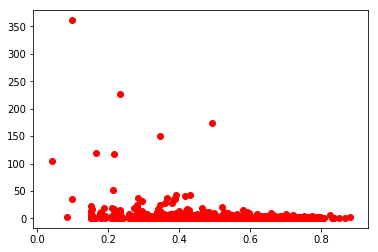

In [38]:
## First, we want to look at the relationship between total hate crimes and pct Trump votes

plt.scatter(x=merge2['Donald Trump'], y=merge2['Total_Hate_Crimes'], color = 'red')

(0, 50)

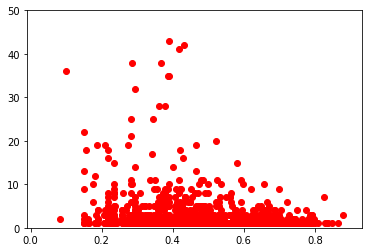

In [39]:
# let's re-adjust the x axis, to make the scatterplot clearer

plt.scatter(x=merge2['Donald Trump'], y=merge2['Total_Hate_Crimes'], color = 'red')

plt.ylim(0, 50)

It looks like the total number of hate crimes is highest in areas with 20-40% republican voters

(0, 50)

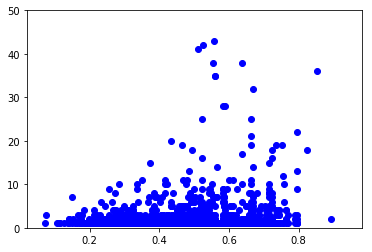

In [40]:
## Now for Hillary

plt.scatter(x=merge2['Hillary Clinton'], y=merge2['Total_Hate_Crimes'], color = 'blue')

plt.ylim(0, 50)

Here, we see the opposite. There are a larger number of hate crimes in areas with 50-80% Clinton voters. Although, there's a lot of clustering around the 0, so it's hard to say whether these points are significant of just outliers. More statistical analysis is needed to determine whether this pattern is statistically significant.

(0, 50)

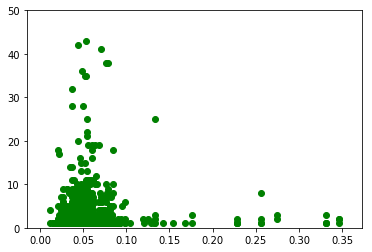

In [41]:
# Independents

plt.scatter(x=merge2['Independent'], y=merge2['Total_Hate_Crimes'], color = 'green')

plt.ylim(0, 50)

Here, we see a large cluster over the .1, but that may be due to the relativly small amount of independent voters per county

The graphs indicated that more hate crimes occured in cities where Trump received 20-40% of the vote, Hillary received 50-80%, and the Independents received roughly 5%. There are a few possible explanations for this, one of which is that in cities with close elections there is more social tension, and thus a higher probability for hate crimes to occur. 

(0, 50)

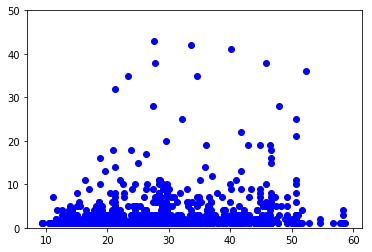

In [42]:
## Now we're going to look at education:

plt.scatter(x=merge2['college_pct'], y=merge2['Total_Hate_Crimes'], color = 'blue')

plt.ylim(0, 50)

There doesn't appear to be a clear connection between the total number of hate crimes per county and the percent of the county that is college educated (although we did only examine cities)

(0, 50)

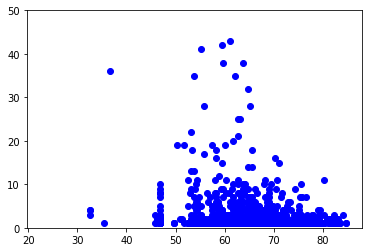

In [43]:
## Now we're going to look at home ownership:

plt.scatter(x=merge2['homeownership'], y=merge2['Total_Hate_Crimes'], color = 'blue')

plt.ylim(0, 50)

Here, it does appear that counties with a lower pct of homeowners tend to also have more total hate crimes, although again because of the amount of clustering around 0, this trend may not be statistically significant

(0, 50)

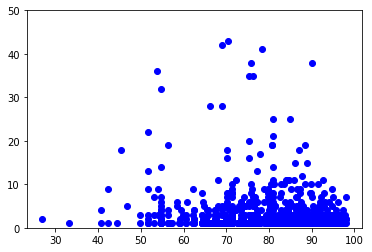

In [44]:
## Percent White:

plt.scatter(x=merge2['white_pct'], y=merge2['Total_Hate_Crimes'], color = 'blue')

plt.ylim(0, 50)

Surprisingly, there does not appear to be an apparent relationship between the percent white a county is and the total number of hate crimes

(0, 50)

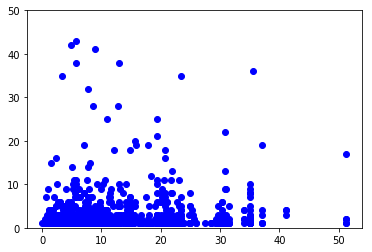

In [45]:
## Foreign Born

plt.scatter(x=merge2['foreign_born_pct'], y=merge2['Total_Hate_Crimes'], color = 'blue')

plt.ylim(0, 50)

Likewise, there does not appear to be a clear relationship between the pct of the population that is foreign born and the number of hate crimes

(0, 50)

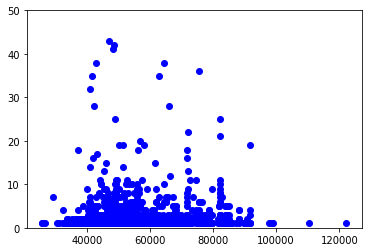

In [46]:
## Median Household Income

plt.scatter(x=merge2['median_household_income'], y=merge2['Total_Hate_Crimes'], color = 'blue')

plt.ylim(0, 50)

There may be a weak relationship between the median household income and the total hate crimes per county. The wealthiest outliers seem to have a very low number of hate crimes, while the scatterplot peaks at around 50k

There was no clear relationship between the percent of the population in college, the percent of the population that is white, and the percent of the population that is foreign born and the total number of hate crimes. There may be a weak relationship between home ownership and the median household income and the average number of hate crimes. This would indicate that cities with a lower than average socioeconomic level are more likely to have more hate crimes, although one could argue that those cities might have a higher crime rate in general. Further statistical analysis is needed to determine whether these findings are significant. There is some clustering at the bottom of these graphs, so it is possible that these observations are merely outliers and not indicative of a larger statistical trend.

(0, 20)

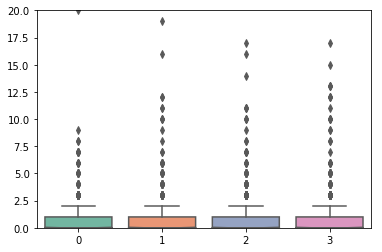

In [47]:
## Next, we're going to compare the number of hate crimes per quarter:

Qs = merge2.iloc[:, 10:14] #selecting the Q1-Q4 cols

QArray = np.array(Qs)

QArray1 = np.nan_to_num(QArray) #making NaNs into 0

QBox = sns.boxplot(data = QArray1, orient = "v", palette = "Set2", notch = True)

plt.ylim(0, 20) #limiting the Y axis, so we can see the boxlots

The boxplot here is still too small, so I'll adjust the Y axis further:

(0, 5)

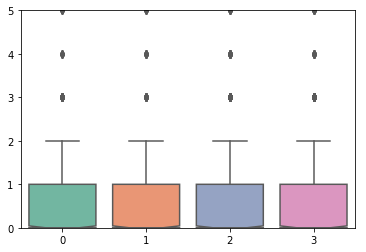

In [48]:
QBox = sns.boxplot(data = QArray1, orient = "v", palette = "Set2", notch = True)

plt.ylim(0, 5)

Here we can see that the quarters aren't statistically signifcantly different from one another in terms of number of hate crimes 

(0, 20)

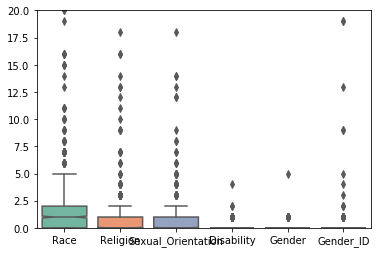

In [49]:
## Now, we're going to make boxplots comparing the different biases in hate crimes:

Motives = merge2.iloc[:, 4:10]

QBox = sns.boxplot(data = Motives, orient = "v", palette = "Set2", notch = True)

plt.ylim(0, 20)

This is again too small to see, so I'll adjust the Y axis again

(0, 5.5)

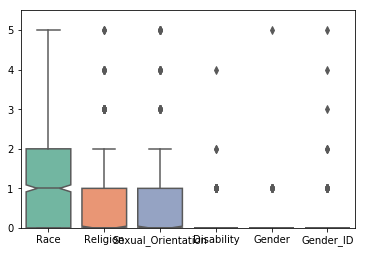

In [50]:
QBox = sns.boxplot(data = Motives, orient = "v", palette = "Set2", notch = True)

plt.ylim(0, 5.5)

Here, we can see that most hate crimes are committed based on race, which is expected, with Religion and Sexual Orientation following. The notches do not overlap between race and the other biases, indicating that the difference is statistically significant. Disability, Gender, and Gender Identity are less common biases

In [51]:
## Now I'm going to create a factor around whether the election was close, and compare the total hate crimes

merge2["El_Dif"] = merge2["Donald Trump"] - merge2["Hillary Clinton"]

merge2["El_Dif"] = np.abs(merge2["El_Dif"])

merge2.head()

,index,State,Agency_Type,Agency_Name,Race,Religion,Sexual_Orientation,Disability,Gender,Gender_ID,...,shipments,sales,retail_sales,retail_sales_per_cap,acc_food_sales,building_permits,land_area,pop_per_sq_mile,Total_Hate_Crimes,El_Dif
0,7,Alabama,Cities,Birmingham,7,1,1,0,0,0,...,10260950.0,13756797.0,11066328.0,16730.0,1268154.0,2280.0,1111.28,592.5,9,0.072272
1,8,Alabama,Cities,Florence,1,0,0,0,0,0,...,1083658.0,514555.0,1131585.0,12783.0,136587.0,54.0,667.70,138.8,1,0.460104
2,9,Alabama,Cities,Foley,1,0,0,0,0,0,...,1410273.0,0.0,2966489.0,17166.0,436955.0,1384.0,1589.78,114.6,1,0.577862
3,10,Alabama,Cities,Hoover,3,0,0,0,0,0,...,10260950.0,13756797.0,11066328.0,16730.0,1268154.0,2280.0,1111.28,592.5,3,0.072272
4,13,Alaska,Cities,Anchorage,4,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN


(array([432., 196., 168., 122., 132., 135.,  50.,  20.,   7.,   3.]),
 array([0.        , 0.08872452, 0.17744905, 0.26617357, 0.3548981 ,
        0.44362262, 0.53234715, 0.62107167, 0.7097962 , 0.79852072,
        0.88724525]),
 <a list of 10 Patch objects>)

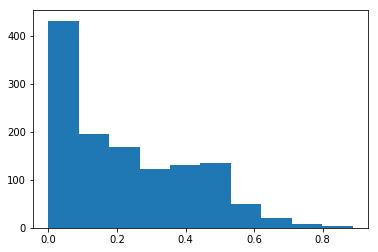

In [52]:
# Now I'm going to create a historgram of the election differences, to pick a value to use to determine whether
# the election was close

difs = merge2["El_Dif"]

DifArray = np.array(difs)

DifArray1 = np.nan_to_num(DifArray)

plt.hist(DifArray1)

In [53]:
# So it looks like there's a large number of close elections, and we're going to use a cutoff of 0.1 
# (this is somewhat arbitrary, but does appear as if it will include a large portion of the data)

### Now we're going to create a factor, and compare the total hate crimes

def func(x):
    if x < 0.1:
        return "Close"
    return "Not_Close"

merge2["Close_El"] = merge2["El_Dif"].apply(func)

merge2.head()

,index,State,Agency_Type,Agency_Name,Race,Religion,Sexual_Orientation,Disability,Gender,Gender_ID,...,sales,retail_sales,retail_sales_per_cap,acc_food_sales,building_permits,land_area,pop_per_sq_mile,Total_Hate_Crimes,El_Dif,Close_El
0,7,Alabama,Cities,Birmingham,7,1,1,0,0,0,...,13756797.0,11066328.0,16730.0,1268154.0,2280.0,1111.28,592.5,9,0.072272,Close
1,8,Alabama,Cities,Florence,1,0,0,0,0,0,...,514555.0,1131585.0,12783.0,136587.0,54.0,667.70,138.8,1,0.460104,Not_Close
2,9,Alabama,Cities,Foley,1,0,0,0,0,0,...,0.0,2966489.0,17166.0,436955.0,1384.0,1589.78,114.6,1,0.577862,Not_Close
3,10,Alabama,Cities,Hoover,3,0,0,0,0,0,...,13756797.0,11066328.0,16730.0,1268154.0,2280.0,1111.28,592.5,3,0.072272,Close
4,13,Alaska,Cities,Anchorage,4,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,Not_Close


(0, 50)

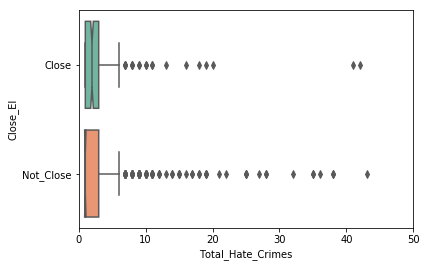

In [54]:
## Now I'll construct the boxplot to compare them, but I'll put 0s in the Nans in the total hate crimes col

close_box = sns.boxplot(x="Total_Hate_Crimes", y = "Close_El", data = merge2, palette = "Set2", notch = True)

plt.xlim(0, 50)

I can't see much from this compact of a graph, so we're going to change the X axis to 10

(0, 10)

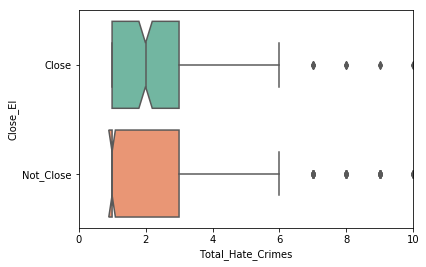

In [55]:
close_box_adj = sns.boxplot(x="Total_Hate_Crimes", y = "Close_El", data = merge2, palette = "Set2", notch = True)

plt.xlim(0, 10)

This plot shows a statistically significant difference in the average number of hate crimes between counties where the elctions are close vs those where the election was not close. The boxplot constructed shows a statistically significant difference between the number of hate crimes in cities where the election was close (median = ~ 2) and those that were not (median= ~1). These results can are up for interpretation. They may mean that an increased social tension, as evidenced by close election results, can lead to more hate crimes. However, this may not be a clinically significant difference, meaning that this information may not be useful to the government. If the difference between these two groups is only one hate crime, it might not be worth increasing resources. 


Next, we're going to do some statistical analysis, namely calculating pearson's r, which measures the correlation between two variables. The closer to 1, the stronger the positive correlation. The closer to -1, the stronger the negative correlation. Before we can start, we need to define a function that calculates r values for each variable. This is done below:

In [56]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

Next, we're going to drop all the NA rows, because the NA rows are the ones that couldn't be matched with the merge earlier, and there is no demographic or political information to go off of. This will reduce the row count by 218 from 1265 to 1047

In [57]:
cleaned = merge2.dropna()

cleaned.head()

,index,State,Agency_Type,Agency_Name,Race,Religion,Sexual_Orientation,Disability,Gender,Gender_ID,...,sales,retail_sales,retail_sales_per_cap,acc_food_sales,building_permits,land_area,pop_per_sq_mile,Total_Hate_Crimes,El_Dif,Close_El
0,7,Alabama,Cities,Birmingham,7,1,1,0,0,0,...,13756797.0,11066328.0,16730.0,1268154.0,2280.0,1111.28,592.5,9,0.072272,Close
1,8,Alabama,Cities,Florence,1,0,0,0,0,0,...,514555.0,1131585.0,12783.0,136587.0,54.0,667.70,138.8,1,0.460104,Not_Close
2,9,Alabama,Cities,Foley,1,0,0,0,0,0,...,0.0,2966489.0,17166.0,436955.0,1384.0,1589.78,114.6,1,0.577862,Not_Close
3,10,Alabama,Cities,Hoover,3,0,0,0,0,0,...,13756797.0,11066328.0,16730.0,1268154.0,2280.0,1111.28,592.5,3,0.072272,Close
7,18,Arizona,Cities,Apache Junction,2,0,0,0,0,0,...,450438.0,2033110.0,6718.0,341933.0,1744.0,5365.61,70.0,2,0.193167,Not_Close


Now we're going to calculate the r for each variable with Total Hate Crimes, in order to determine which variables significantly factor into the rate of hate crimes. We're also going to calculae the p value for each r using bootstrapping. This means that we use a permutation to make many more random samples, and then calculate the mean r from all those samples. If the proportion of means that are higher than the mean calculated from the sample is less than 0.05, we can assume that the calculated mean did not occur simply by chance and is statistically significant. If it is not, we can assume that the calculated r does not significantly factor into the total number of hate crimes per city. 

In [58]:
# Trump vote is first!
r1 = pearson_r(cleaned['Donald Trump'], cleaned['Total_Hate_Crimes'])
print(r1)

# -0.16

perm_replicates1 = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    Trump_permuted = np.random.permutation(cleaned['Donald Trump'])

    # Compute Pearson correlation
    perm_replicates1[i] = pearson_r(Trump_permuted, cleaned['Total_Hate_Crimes'])

# Compute p-value: p
p = np.sum(perm_replicates1 >= r1) / len(perm_replicates1)
print('p-val =', p)


-0.16057419263200617
p-val = 1.0


Here, the p value is quite high, so we can assume that the correlation between these two variables is not statistically significant

In [59]:
# Next is Hillary!

r2 = pearson_r(cleaned["Hillary Clinton"], cleaned['Total_Hate_Crimes'])
print(r2)

# 0.1655

perm_replicates2 = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    Hillary_permuted = np.random.permutation(cleaned["Hillary Clinton"])

    # Compute Pearson correlation
    perm_replicates2[i] = pearson_r(Hillary_permuted, cleaned['Total_Hate_Crimes'])

# Compute p-value: p
p = np.sum(perm_replicates2 >= r2) / len(perm_replicates2)
print('p-val =', p)

0.1655372263784544
p-val = 0.0


Here, the p value is quite small. We see a positive correlation between the percent of hillary voters and the average number of hate crimes in a given city. This indicates that about 17% of the variation in the number of hate crimes is explained by the percentage of the vote Hillary recieved.

In [60]:

# Next is the Independents

ri = pearson_r(cleaned["Independent"], cleaned['Total_Hate_Crimes'])
print(ri)

# r = -0.03365565558893756

perm_replicates_ind = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    ind_permuted = np.random.permutation(cleaned["Independent"])

    # Compute Pearson correlation
    perm_replicates_ind[i] = pearson_r(ind_permuted, cleaned['Total_Hate_Crimes'])

# Compute p-value: p
p = np.sum(perm_replicates_ind >= ri) / len(perm_replicates_ind)
print('p-val =', p)

-0.03365565558893756
p-val = 0.9502


the percent of the vote the independent candidates had has a very high p value, indicating that this variable is not statistically significant, and that there is no relationship between the percent of the vote that went to indpendent candidates and the total number of hate crimes

In [61]:
# Next, we look at the difference in the vote
r3 = pearson_r(cleaned["El_Dif"], cleaned['Total_Hate_Crimes'])
print(r3)

# 0.107

perm_replicates3 = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    dif_permuted = np.random.permutation(cleaned["El_Dif"])

    # Compute Pearson correlation
    perm_replicates3[i] = pearson_r(dif_permuted, cleaned['Total_Hate_Crimes'])

# Compute p-value: p
p = np.sum(perm_replicates3 >= r3) / len(perm_replicates3)
print('p-val =', p)

0.10703119887693767
p-val = 0.0004


Again, we have a significant p value and a positive r. This indicates that about 11% of the variation in the total number of hate crimes is explained by how close the election is. In fact, it says that the larger the election difference is, the more hate crimes there are. This is contrary to our findings earlier. This might mean that the difference is only significant when it is very small (difference between candidates is less than 10%) and that when we take into account the entire dataset, the trend is positive

In [62]:
# Next, we look at the percentage that went to college

r4 = pearson_r(cleaned['college_pct'], cleaned['Total_Hate_Crimes'])
print(r4)

# 0.13

perm_replicates4 = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    college_permuted = np.random.permutation(cleaned['college_pct'])

    # Compute Pearson correlation
    perm_replicates4[i] = pearson_r(college_permuted, cleaned['Total_Hate_Crimes'])

# Compute p-value: p
p = np.sum(perm_replicates4 >= r4) / len(perm_replicates4)
print('p-val =', p)

0.13235943259447988
p-val = 0.0


Here there is also a very small p value, indicating a statistically significant figure. We can determine that abotu 13% of the variability in the total number of hate crimes is explained by the percent of the population that went to college. The positive correlation indicates that the higher the percent of college educated people, the more hate crimes there are. This could also be explained by the idea that more urban cities likely have a higher percent of college educated people and also have a larger population, and thus more hate crimes

In [63]:
## Now we'll look at homeownership

r5 = pearson_r(cleaned['homeownership'], cleaned['Total_Hate_Crimes'])
print(r5)

# -0.25

perm_replicates5 = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    homes_permuted = np.random.permutation(cleaned['homeownership'])

    # Compute Pearson correlation
    perm_replicates5[i] = pearson_r(homes_permuted, cleaned['Total_Hate_Crimes'])

# Compute p-value: p
p = np.sum(perm_replicates5 >= r5) / len(perm_replicates5)
print('p-val =', p)

-0.25143595506879335
p-val = 1.0


homeownership has a very high p value, indicating that this variable is not statistically significant, and that there is no relationship between homeownership and the total number of hate crimes

In [64]:
# Next is the percent of the population that is white

r6 = pearson_r(cleaned['white_pct'], cleaned['Total_Hate_Crimes'])
print(r6)

# -0.1277

perm_replicates6 = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    white_permuted = np.random.permutation(cleaned['white_pct'])

    # Compute Pearson correlation
    perm_replicates6[i] = pearson_r(white_permuted, cleaned['Total_Hate_Crimes'])

# Compute p-value: p
p = np.sum(perm_replicates6 >= r6) / len(perm_replicates6)
print('p-val =', p)

-0.12773829575697343
p-val = 0.9996


Again, we have a very high p value. This indicatesthat this variable is not statistically significant, and that there is no relationship between the percent of the population that is white and the total number of hate crimes

In [65]:
# percent of the pop that is foreign born

r7 = pearson_r(cleaned['foreign_born_pct'], cleaned['Total_Hate_Crimes'])
print(r7)

# 0.108

perm_replicates7 = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    foreign_permuted = np.random.permutation(cleaned['foreign_born_pct'])

    # Compute Pearson correlation
    perm_replicates7[i] = pearson_r(foreign_permuted, cleaned['Total_Hate_Crimes'])

# Compute p-value: p
p = np.sum(perm_replicates7 >= r7) / len(perm_replicates7)
print('p-val =', p)

0.10840675124420601
p-val = 0.0012


Here we have a significant p value, indicating that there is a statistically significant relaitonship of r=~0.11 between the percent of the population that is foreign born and the total number of hate crimes. Again, however, the number of foreign born people in a city likely also correlated with how urban the city is and thus the number of people who live there. This would affect the total number of hate crimes

In [66]:
## Lastly, we have median household income

r8 = pearson_r(cleaned['median_household_income'], cleaned['Total_Hate_Crimes'])
print(r8)

# 0.031

perm_replicates8 = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    income_permuted = np.random.permutation(cleaned['median_household_income'])

    # Compute Pearson correlation
    perm_replicates8[i] = pearson_r(income_permuted, cleaned['Total_Hate_Crimes'])

# Compute p-value: p
p = np.sum(perm_replicates8 >= r8) / len(perm_replicates8)
print('p-val =', p)

0.0310514751638103
p-val = 0.1574


We see a very high p value (over 0.05). This indicatesthat this variable is not statistically significant, and that there is no relationship between the percent of the median household income and the total number of hate crimes

Lastly, we're going to attempt to model the number of hate crimes based on statistically significant factors found within this dataset. 

In [67]:
# Here, we call X all the non-target variables (all vars except total # hate crimes) and Y is the target variable
# (Total Number of Hate Crimes)

X = cleaned[['median_household_income', 'foreign_born_pct', 'white_pct', 'homeownership', 'college_pct', 'El_Dif']].copy()
#X.drop(['Total_Hate_Crimes'], axis=1)

y = cleaned['Total_Hate_Crimes']


Before I start creating models, I want to normalize the other variables. I'm going to make sure they're on the same scale (0-1) relativly. I'll achieve this by making sure all the percentages and other varsare on a 0-1 scale

In [99]:
cleaned["college_pct"] = cleaned["college_pct"]/100

cleaned["college_pct"].head()

0    0.300
1    0.211
2    0.277
3    0.300
7    0.180
Name: college_pct, dtype: float64

In [101]:
cleaned['foreign_born_pct'] = cleaned['foreign_born_pct']/100

cleaned['foreign_born_pct'].head()

0    0.041
1    0.021
2    0.036
3    0.041
7    0.101
Name: foreign_born_pct, dtype: float64

In [103]:
cleaned['white_pct'] = cleaned['white_pct']/100

cleaned['white_pct'].head()

0    0.540
1    0.867
2    0.871
3    0.540
7    0.832
Name: white_pct, dtype: float64

In [106]:
cleaned['median_household_income'] = (cleaned['median_household_income']/cleaned['median_household_income'].max())

cleaned['median_household_income'].head()

0    0.371644
1    0.350497
2    0.410846
3    0.371644
7    0.409259
Name: median_household_income, dtype: float64

In [108]:
cleaned['homeownership'] = (cleaned['homeownership']/cleaned['homeownership'].max())

cleaned['homeownership'].head()

0    0.762972
1    0.824292
2    0.856132
3    0.762972
7    0.877358
Name: homeownership, dtype: float64

In [109]:
# Here we use Lasso to do feature selection. All non-important features will go to 0

# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)


[ 0.  0. -0. -0.  0.  0.]


Here, none of the coeffieients appear to be significant, so it's unlikely we'll obtain a very useful model. We will still try and model the data using the features that we found to be statistically significant previously. 
These are El_Dif, Hillary Clinton, college_pct, and foreign_born_pct. We'll look at the significance. We'll examine each one using ols, which creates a linear model for each variable combination and outputs various statistics

In [110]:
from statsmodels.formula.api import ols

cleaned = cleaned.rename(columns={"Hillary Clinton":"Hillary"})

mAll = ols('Total_Hate_Crimes ~ El_Dif + Hillary + college_pct + foreign_born_pct',cleaned).fit()
print(mAll.summary())


                            OLS Regression Results                            
Dep. Variable:      Total_Hate_Crimes   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     11.24
Date:                Thu, 30 Aug 2018   Prob (F-statistic):           6.26e-09
Time:                        17:31:02   Log-Likelihood:                -4407.0
No. Observations:                1047   AIC:                             8824.
Df Residuals:                    1042   BIC:                             8849.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -8.0946      1.990  

Here, we can see that only Hillary and the Election Difference made a statistically significant contribution to the enire model. Given those, we could only come up with an R-sq value of 0.041, meaning that only 4.1% of the variation in total hate crimes was explained by our model. Let's try creating some dummy or categorical variables and using those to predict the number of hate crimes

In [93]:
def winner(x):
    if cleaned['Hillary'][x] > cleaned['Donald Trump'][x]:
        return "Hillary"
    if cleaned['Hillary'][x] < cleaned['Donald Trump'][x]:
        return "Trump"
    return "Independent"

cleaned['winner'] = cleaned.apply(lambda x: winner(x), axis=1)

#win = []

#for i in range(len(cleaned)):
#    if cleaned['Hillary'][i] > cleaned['Donald Trump'][i]:
#        win[i] = "Hillary"
#    elif cleaned['Hillary'][i] < cleaned['Donald Trump'][i]:
#        win[i] = "Trump"
#    else win[i] = "Independent"
    


ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', 'occurred at index 0')

0.2951595033428845

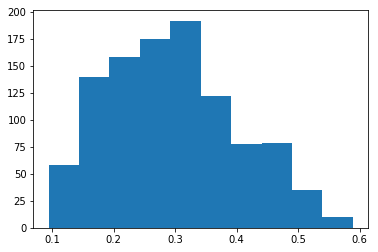

In [111]:
college = cleaned["college_pct"]

collegeArray = np.array(college)

collegeArray = np.nan_to_num(collegeArray)

plt.hist(collegeArray)

collegeArray.mean()

So the mean looks to be about 30% (0.3), we we'll divide it there.

In [113]:
def college(x):
    if x < 0.3:
        return "low_college"
    return "high_college"

cleaned["college_var"] = cleaned["college_pct"].apply(college)

cleaned["college_var"].head()

0    high_college
1     low_college
2     low_college
3    high_college
7     low_college
Name: college_var, dtype: object

0.48194327658238306

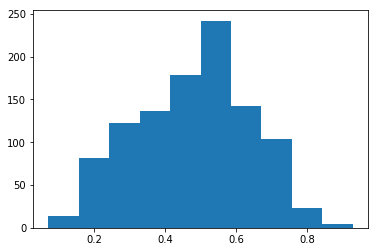

In [114]:
hillary = cleaned["Hillary"]

HilArray = np.array(hillary)

HilArray = np.nan_to_num(HilArray)

plt.hist(HilArray)

HilArray.mean()

In [115]:
def hil(x):
    if x > 0.48:
        return "dem"
    return "other"

cleaned["hil_var"] = cleaned["Hillary"].apply(hil)

cleaned["hil_var"].head()

0      dem
1    other
2    other
3      dem
7    other
Name: hil_var, dtype: object

0.11889971346704871

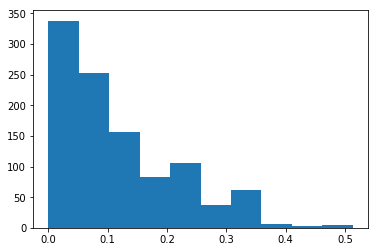

In [116]:
foreign = cleaned['foreign_born_pct']

forArray = np.array(foreign)

forArray = np.nan_to_num(forArray)

plt.hist(forArray)

forArray.mean()

In [118]:
def fb(x):
    if x > 0.12:
        return "high_pct"
    return "low_pct"

cleaned["for_var"] = cleaned["foreign_born_pct"].apply(fb)

cleaned["for_var"].head()

0    low_pct
1    low_pct
2    low_pct
3    low_pct
7    low_pct
Name: for_var, dtype: object

Now that all these are turned into categorical variables, we'll try the model again!

In [119]:
mCat = ols('Total_Hate_Crimes ~ Close_El + hil_var + college_var + for_var',cleaned).fit()
print(mCat.summary())

                            OLS Regression Results                            
Dep. Variable:      Total_Hate_Crimes   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.371
Date:                Thu, 30 Aug 2018   Prob (F-statistic):            0.00943
Time:                        17:41:37   Log-Likelihood:                -4422.4
No. Observations:                1047   AIC:                             8855.
Df Residuals:                    1042   BIC:                             8880.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

So this model has an even lower R-sq value. It doesn't look like this was an improvement on the model. There might not be a good predicttive model given these variables